In [5]:
#importing the dataset for development
#!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 8.4 MB/s 
     |████████████████████████████████| 98 kB 7.4 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [6]:
import tensorflow as tf

#import Tensorflow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [8]:
#import the fashion MNIST dataset
dataset,metadata = tfds.load('fashion_mnist',as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
#mapping datasets(with a single label) and plotting the images
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
#Exploring the data before training the model it will shows 60,000 images

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [11]:
#preprocess the data
# For the model to work properly, these values need to be normalized to the range [0,1]
# create a normalization function, and then apply it to each image in the test and train datasets.

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

  #The map function applies the normalize function to each element in the train and test datasets

  train_dataset = train_dataset.map(normalize)
  test_dataset = train_dataset.map(normalize)

  #The first time you use the dataset, the images will be loaded from disk
  #Caching will keep them in memory, making training faster

  train_dataset = train_dataset.cache()
  test_dataset = test_dataset.cache()


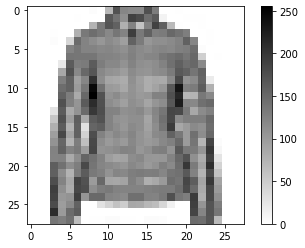

In [12]:
#Explore the processed data
# plot an image to see what it looks like

#take a single image, and remove the color dimension by reshaping

for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))


#plot the image - voila a piece of fashion clothing

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show>

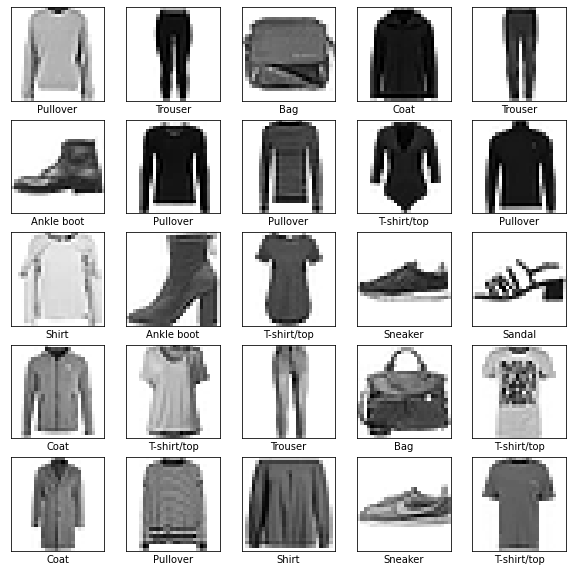

In [13]:
#Diplay the first 25 images from the training set and display the class name
#verify the data is in the correct format 
#next build and train the network
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show



In [14]:
#Build the model
#Building the neural network requires configuring the layers of the model, then compiling the model
#Setting up the layers
#layer extracts a representation from the data fed into it.
#series of connected layers results in a representation that is meaningful for the problem at hand.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [15]:
from tensorflow.python.eager.monitoring import Metric
#Compile the model
#Before the model is ready for training
#Loss function — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
#Optimizer — An algorithm for adjusting the inner parameters of the model in order to minimize loss.
#Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
#configuration of compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
#Train the model
#define the iteration behaviour for the train dataset:
#Repeat forever by specifying dataset.repeat()
#epochs parameter described below limits how long we perform training
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [17]:
#As the model trains, the loss and accuracy metrics are displayed.
#This model reaches an accuracy of about 0.88 (or 88%) on the training data.

model.fit(train_dataset, epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 15s 4ms/step - loss: 2.8125 - accuracy: 0.6816
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7089 - accuracy: 0.7394
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6223 - accuracy: 0.7804
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5673 - accuracy: 0.8027
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5485 - accuracy: 0.8092


In [18]:
#Evaluating the accurancy
#Comparing how model performance

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Accuracy on the test:-",test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.6256 - accuracy: 0.7999
Accuracy on the test:- 0.7998999953269958


In [19]:
#Make predication and explore
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [20]:
predictions.shape

(32, 10)

In [21]:
# the model has predicted the label for each image in the testing set. Let's take a look at the first prediction

predictions[0]

array([1.31231882e-05, 2.14936763e-10, 3.02650243e-01, 3.22680222e-04,
       5.80578804e-01, 1.36557141e-19, 1.16417684e-01, 0.00000000e+00,
       1.74663492e-05, 1.25799895e-27], dtype=float32)

In [22]:
#A prediction is an array of 10 numbers.
#describe the "confidence" of the model that the image corresponds to each of the 10 different
#articles of clothing
np.argmax(predictions[0])

4

In [23]:
test_labels[0]

4

In [28]:
#We can graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

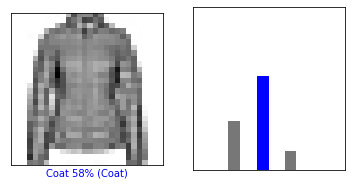

In [29]:
# let's look at the 0th image, predictions and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

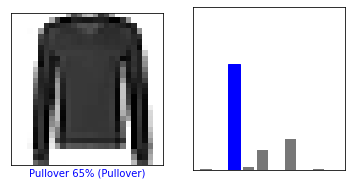

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

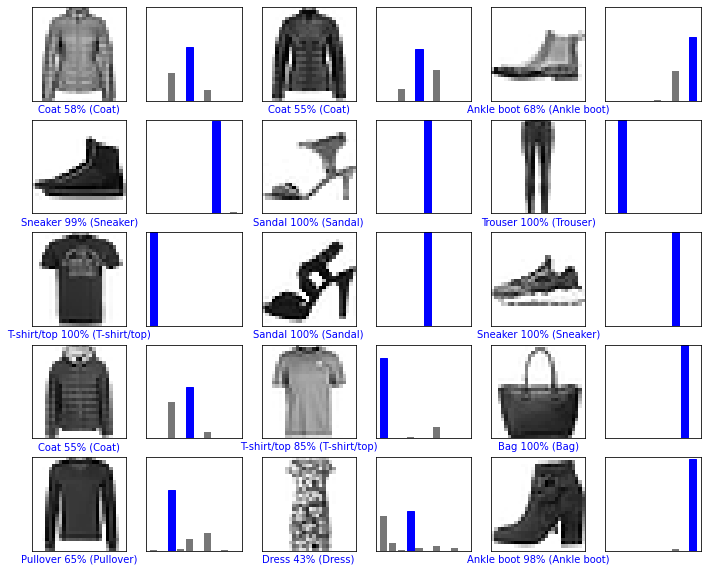

In [31]:
# plot several images with their predictions.
#Correct prediction labels are blue and incorrect prediction labels are red. 
#The number gives the percent (out of 100) for the predicted label. 
#Note that it can be wrong even when very confident.

#plot the first X test images, their predicted label, and the true label
#color correct predictions in blue, in correct prediction in red

num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows,2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
  


In [32]:
#Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [33]:
#tf.keras models are optimized to make prediction on a batch or collection
#so even though we're using a single image we need to add it to a list
# Add the image to a batch where it's the only member.

img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [34]:
#Now predict the image

predictions_single = model.predict(img)

print(predictions_single)

[[1.3123204e-05 2.1493433e-10 3.0265006e-01 3.2268011e-04 5.8057892e-01
  1.3655717e-19 1.1641782e-01 0.0000000e+00 1.7466351e-05 1.2579992e-27]]


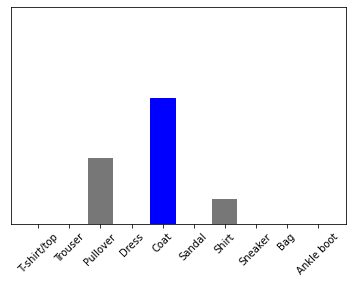

In [35]:
#model.predict returns a list of lists, one for each image in the batch of data.
#Grab the predictions for our (only) image in the batch:
plot_value_array(0, predictions_single, test_labels)
_= plt.xticks(range(10), class_names, rotation = 45)


In [36]:
np.argmax(predictions_single[0])

4